# MODELAGEM E SIMULAÇÃO DO MUNDO FÍSICO #

*PROJETO HOTWHEELS*




**Os parâmetros**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# colocando os parâmetros

mr = 0.5/1000 #em gramas
m = 42.24/1000 #em gramas
R1 = 1/1000 #em metros
R2 = 99/2/1000 #em metros
I = 1/2*(mr*((R1**2)+(R2**2)))
g = 9.8 #metros/segundo**2
peso = m*g #em N
Cd = 0.82
A = (2/100)*(2/100)
p = 1
ang = math.radians(60)
sen = math.sin(ang)
cos = math.cos(ang)
altura = 0.3*math.sin(ang)
Xmax = altura/math.tan(ang) #comprimento no eixo x
R_do_loop = 11/100

print(Xmax)

0.15000000000000002


**Na rampa**

In [2]:
def EquaçãoDiferencial(listaSolucao, t, a, Xmax):
    x = listaSolucao[0]
    y = listaSolucao[1]
    Vx = listaSolucao[2]
    Vy = listaSolucao[3]
    v = math.sqrt(Vx**2 + Vy**2)
    D = 1/2*(p*Cd*A*(v**2))
    N = peso*cos
    fat = (peso*sen-D)/(4 + m*(R2**2)/I)
    D = 0
    dxdt = Vx
    dydt = Vy
    dVxdt = ((N*sen) - (D*cos) - (4*fat*cos))/m
    dVydt = ((N*cos) + (D*sen) + (4*fat*sen))/m - g    
    if x > Xmax:        
        dVxdt = 0
        dVydt = 0
        
        
    return dxdt, dydt, dVxdt, dVydt, v



    

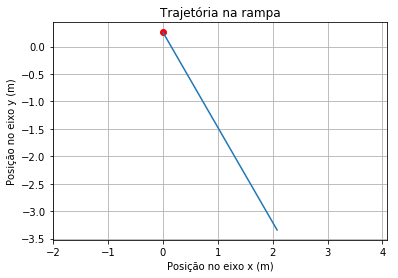

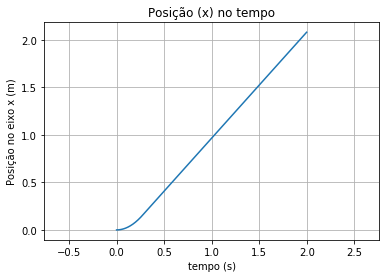

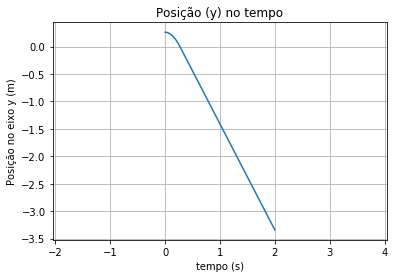

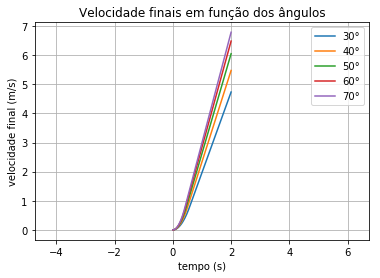

3.794011152978744

In [3]:
delta_t = 1e-3
tempo = np.arange(0,2,delta_t)
CI = [0,altura,0,0,0]
solucao = odeint(EquaçãoDiferencial, CI, tempo, args=(ang, Xmax))

#plotando posição inicial
plt.plot(CI[0],CI[1],'ro')

#plotando trajtória
plt.plot(solucao[:,0], solucao[:,1])
plt.xlabel('Posição no eixo x (m)')
plt.ylabel('Posição no eixo y (m)')
plt.title('Trajetória na rampa')
plt.axis('equal')
plt.grid(True)
plt.show()

#plotando x no tempo
plt.plot(tempo, solucao[:,0])
plt.xlabel('tempo (s)')
plt.ylabel('Posição no eixo x (m)')
plt.title('Posição (x) no tempo')
plt.axis('equal')
plt.grid(True)
plt.show()

#plotando y no tempo
plt.plot(tempo, solucao[:,1])
plt.xlabel('tempo (s)')
plt.ylabel('Posição no eixo y (m)')
plt.title('Posição (y) no tempo')
plt.axis('equal')
plt.grid(True)
plt.show()


#gráfico da influência do ângulo na velocidade final da rampa

lista_de_angulos = [30,40,50,60,70]
for angulo in lista_de_angulos:    
    ang_radianos = math.radians(angulo)
    sen = math.sin(ang_radianos)
    cos = math.cos(ang_radianos)
    altura = 0.8*math.sin(ang_radianos)
    Xmax = altura/math.tan(ang_radianos)
    CI2 = [0,altura,0,0,0]
    solucao_para_velocidade = odeint(EquaçãoDiferencial, CI2, tempo, args=(ang_radianos,Xmax ))
    vxf = solucao_para_velocidade[:,2][-1]
    vyf = solucao_para_velocidade[:,3][-1]
    vf = math.sqrt((vxf**2) + (vyf**2))
    plt.plot(tempo, solucao_para_velocidade[:,4],label="{0}°".format(angulo))
    plt.xlabel('tempo (s)')
plt.ylabel('velocidade final (m/s)')
plt.title('Velocidade finais em função dos ângulos')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

vf



**Validação por energia**


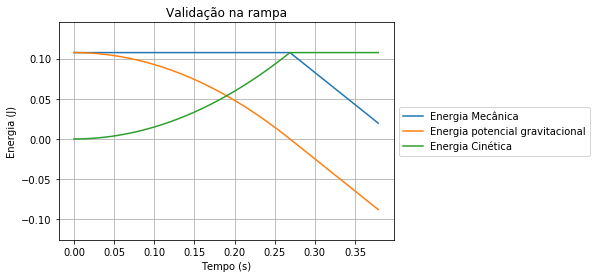

In [4]:
#calcular a energia do carrinho
energia_gravitacional=[]
energia_cinetica=[]
energia_total=[]

for i in range(len(tempo)):  
    x = solucao[:,0][i]
    y = solucao[:,1][i]
    Vx = solucao[:,2][i]
    Vy = solucao[:,3][i]
    Vt = math.sqrt((Vx**2) + (Vy**2))
    cinetica = (m*Vt**2)/2 +4*(I*(Vt/R2)**2)/2                                      
    pot_gravitacional = m*g*y
    mecanica = cinetica+ pot_gravitacional
    
    if x <= Xmax:
        energia_gravitacional.append(pot_gravitacional)
        energia_cinetica.append(cinetica)
        energia_total.append(mecanica)
    else:
        break

#achando o último termo da lista de energia para criar depois uma lista equivalente de tempo
ultimo = len(energia_total) 

#criando uma nova lista de tempo
tempo_valida = np.arange(0, ultimo*delta_t, delta_t )

#plotando o gráfico das energias pelo tempo
plt.plot(tempo_valida, energia_total, label="Energia Mecânica")
plt.plot(tempo_valida, energia_gravitacional, label="Energia potencial gravitacional")
plt.plot(tempo_valida, energia_cinetica, label="Energia Cinética")
plt.ylabel('Energia (J)')
plt.xlabel('Tempo (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.title('Validação na rampa')
plt.grid(True)
plt.show()


**No looping**


In [5]:
def EquaçãoDiferencial2(listaSolucao, t):

    a = listaSolucao[0]
    w = listaSolucao[1]
    dadt = w
    v = w*R_do_loop
    D = 1/2*(p*Cd*A*(v**2))
    D=0
    #velocidade positiva

    if w > 0:
        fat = (-peso*math.cos(a)-D)/(4 + m*(R2**2)/I)       
        dwdt = (-peso*math.cos(a) - D - 4*fat)/(m*R_do_loop) 
        

    #velocidade negativa

    else:
        fat = (peso*math.cos(a)-D)/(4 + m*(R2**2)/I)
        dwdt = (-peso*math.cos(a) + D + 4*fat)/(m*R_do_loop)
    return dadt, dwdt, v
    

4.1377413289072456
4.149112537297281
4.159906879639801
4.1701115402103675
4.179714950191272
4.188706026087542
4.197074283968207
4.2048099786146
4.2119040216655295
4.218348049174371
4.224134484771336
4.229256457713521
4.233707862283914
4.237483393432283
4.240578535215676
4.242989583880086
4.244713646864129
4.245748654961246
4.246093362321783
4.245747350896605
4.244711030335409
4.242985658748
4.240573320576025
4.237476889313345
4.233700077287847
4.229247406511583
4.224124175828116
4.2183364820271745
4.211891197166523
4.2047959300263935
4.197059037537636
4.188689601761798
4.179697388788563
4.170092846558127
4.159887086117834
4.14909183021262
4.1377194134776945
4.125782758370025
4.113295344622825
4.100271171676982
4.086724719574387
4.072670935482418
4.0581251915550665
4.043103253846886
4.027621304366022
4.011695856782334
3.9953437229006594
3.978581987845282
3.9614279924896802
3.943899314153488
3.9260137029698674
3.907789063126711
3.8892434229712567
3.870394921429561
3.8512617623653336
3.83

3.944315271022597
3.9264378330529404
3.9082209390733347
3.8896826257850243
3.870841024481085
3.851714334657391
3.832320796678265
3.8126786641416253
3.7928061770730555
3.7727215363990414
3.752442878340033
3.731988250362278
3.7113755881766197
3.6906226937366036
3.6697472139750804
3.6487666141525503
3.62769816520841
3.6065589265422933
3.58536572784688
3.5641351537136092
3.5428835292411787
3.5216268961696446
3.5003810081816065
3.4791613235690058
3.457982991791715
3.4368608446789226
3.4158093887929066
3.394842787870772
3.3739748611936804
3.3532190867824916
3.332588592365499
3.3120961524317494
3.291754186325133
3.2715747487597087
3.2515695284964004
3.2317498600368912
3.212126718836049
3.1927107229511256
3.173512135567094
3.1545408619617854
3.135806448815579
3.117318102671626
3.0990846879004694
3.081114731625253
3.063416429289407
3.0459976506914073
3.0288659453432043
3.012028536180625
2.9954923406825893
2.979263976526153
2.9633497656905607
2.9477557412060973
2.932487653908291
2.91755097913813

3.9778181749114827
3.994597956146575
4.01096892292202
4.026913973762506
4.0424162690061625
4.05745928917245
4.072026857518903
4.086103170536247
4.099672821623102
4.1127208402419795
4.125232722243499
4.1371944597334815
4.148592558836693
4.1594140732117095
4.169646639244639
4.1792784996474115
4.188298524256061
4.1966962266200385
4.204461803120964
4.211586150202139
4.218060884022942
4.223878346360533
4.2290316375389825
4.233514630036269
4.2373219823230235
4.240449138988038
4.24289235029018
4.244648686987853
4.245716043593524
4.246093144141101
4.245779545458017
4.2447756221303585
4.243082577927268
4.240702445880083
4.2376380775628055
4.233893134379635
4.229472078594963
4.224380199785566
4.218623566194813
4.212209005863892
4.205144098133238
4.197437154371152
4.1890972000319
4.180133993383843
4.170557961388456
4.160380177154506
4.149612342327117
4.138266760549139
4.126356312464805
4.113894452074649
4.10089515017687
4.08737286844786
4.073342533056867
4.058819503810554
4.043819545157906
4.0283

4.417196330288432
4.438301225619911
4.458948252640136
4.479111528392338
4.498765518118056
4.517885088285595
4.536445516731639
4.554422580063769
4.571792614951937
4.588532559347711
4.604620004353014
4.620033244312469
4.634751321545174
4.648754083396758
4.662022228603269
4.674537353796569
4.6862819991152
4.697239684050026
4.707394943485278
4.716733382073435
4.72524170373018
4.732907745295461
4.739720507591625
4.74567018507832
4.750748190030649
4.754947174047087
4.758261047139105
4.760684992893842
4.762215482362181
4.762850295586999
4.762588510539511
4.761430508002547
4.759377970713137
4.756433877131702
4.752602503916482
4.747889426212137
4.742301471856604
4.735846714397446
4.728534450480131
4.7203751736817114
4.7113805752862525
4.701563496421126
4.690937879461269
4.679518741563742
4.667322134801077
4.65436510838908
4.640665700416857
4.626242851680162
4.6111163652493765
4.595306862533891
4.5788357328410205
4.561725094233652
4.543997760677961
4.525677152629532
4.506787258718393
4.487352583

5.679950180247258
5.701737883253605
5.722872954587361
5.743322568510414
5.763055703660794
5.782041887227225
5.8002515744148955
5.817656191581631
5.8342282584700245
5.8499414674760875
5.864770628638432
5.87869185100727
5.891682575578287
5.903721657327061
5.9147893743559194
5.924867552263601
5.933939531469419
5.941990247628222
5.949006295478877
5.954976007279713
5.9598894747863165
5.963738404180675
5.966516335434409
5.968218623910861
5.968842378903807
5.968386556438927
5.966851942808831
5.964241093143681
5.960558402472265
5.955810070996162
5.950004031759934
5.943150001495856
5.93525943028749
5.926345407355886
5.916422720078269
5.905507790826904
5.893618618717702
5.880774666452567
5.8669968648219815
5.85230752879202
5.836730291611305
5.820290163743493
5.803013338202501
5.784927123782376
5.766059887212767
5.746441041975694
5.726100924399125
5.7050707053277465
5.6833823235959535
5.661068439950226
5.638162343902098
5.614697859434913
5.590709275087696
5.566231292914751
5.541298952149402
5.515

4.611304585510246
4.630791499888541
4.650872799132848
4.671531921201733
4.692751538064494
4.714513561307814
4.736799136516138
4.759588636282104
4.782861654260093
4.806597009783033
4.830772759389147
4.855366165295058
4.880353708596227
4.905711092927018
4.931413249350666
4.957434343332426
4.983747787510212
5.0103262553033945
5.037141688061689
5.06416531549001
5.091367675544204
5.118718637182702
5.1461874261392895
5.173742639258021
5.2013522785415764
5.22898380126188
5.256604148620528
5.284179786611155
5.311676750344847
5.339060691463979
5.366296892514295
5.393350335873085
5.4201857774441695
5.446767790478748
5.473060825416872
5.499029271062275
5.52463751028182
5.549849998928423
5.57463133371513
5.598946323717224
5.622760065399093
5.646037991724158
5.668745928460108
5.690850225710166
5.712317810887134
5.733116266012938
5.753213904889478
5.772579824547149
5.7911840020142975
5.808997375377836
5.825991912115537
5.842140682889716
5.857417926281267
5.871799092420599
5.885260946094624
5.8977816

6.272388759757393
6.298686031908705
6.324412136364211
6.34952405404327
6.373980575036348
6.397740836953743
6.420764782411262
6.443013219277764
6.464448000591669
6.485032087199088
6.504729561438395
6.523505832542514
6.541327674941829
6.558163381478991
6.573982765128041
6.5887573609578345
6.602460353049674
6.615066727258681
6.62655339857928
6.636899313697336
6.646085504239927
6.654094872345009
6.660912541989998
6.666525860266861
6.670924319590861
6.674099702163703
6.676046099230341
6.676759832645643
6.67623956444024
6.674486302136834
6.671503302713612
6.667296138359575
6.661872708731487
6.655243092585092
6.647419621999128
6.638416856677861
6.628251520615188
6.616942370952754
6.60451019223528
6.590977720810064
6.576369558497817
6.560712247639072
6.544034056009297
6.526364880797181
6.507736183756651
6.488180973013489
6.467733644852997
6.446429881669392
6.424306564736251
6.4014017157028285
6.377754358100934
6.353404410984884
6.328392593016594
6.302760364416351
6.276549786072412
6.2498034144

5.912823303141065
5.883037461344534
5.85330156698169
5.82365582708213
5.794139742690794
5.764792084222814
5.735650849632631
5.706753225076218
5.678135553231417
5.649833272835532
5.6218809018142935
5.594312039730472
5.567159335113804
5.540454470730186
5.514228139413096
5.488510010144525
5.463328763059778
5.43871207003251
5.414686592207676
5.391277977862265
5.368510832849108
5.346408757532266
5.324994349091548
5.304289204002011
5.284313926821243
5.26508812211869
5.246630410903699
5.228958453465609
5.212088953762662
5.196037671697482
5.180819431059722
5.166448124077278
5.152936738092476
5.140297362466676
5.128541200348135
5.117678580064915
5.10771896308251
5.098670958141017
5.090542330741814
5.083340011847617
5.0770701061979056
5.071737903058076
5.067347881448089
5.063903713811279
5.061408271698634
5.059863629008855
5.059271069240904
5.059631092852655
5.0609434023743125
5.063206907133393
5.066419720744286
5.070579156883248
5.07568172569052
5.08172316342794
5.088698390746751
5.096601502547

7.55906108064589
7.588897955435602
7.618315255983897
7.647261708045865
7.6756877340701495
7.703543654981648
7.7307803434678215
7.757349232673907
7.78320252938255
7.8082932868959345
7.832575493491913
7.8560042610374605
7.878535921141889
7.900128149535287
7.920740124840058
7.940332461462589
7.958867433241516
7.97630922431613
7.992623985929157
8.007779993537033
8.021747469299946
8.034498746378373
8.046008486483199
8.05625379009924
8.065214224601341
8.07287185308779
8.07921125858058
8.08421969233065
8.087887036615255
8.090205882511773
8.091171560416996
8.090782090822943
8.089038276743628
8.085943650996178
8.081504446633033
8.075729648565302
8.06863085138592
8.060222329212218
8.050520993424739
8.039546315129197
8.027320151313903
8.013866774748987
7.9992127565891895
7.983386894445016
7.966420264849464
7.948345931978138
7.929198883999078
7.909015956190829
7.88783578860108
7.86569860616578
7.8426461282037385
7.818721468089003
7.793969040240627
7.76843438050825
7.74216403644719
7.71520546878577

6.796515024162178
6.821038101925227
6.846255724699789
6.872137327091629
6.8986511112422955
6.925764054166728
6.953441917376177
6.981649259872765
7.0103494540598
7.039504705620856
7.06907607722436
7.099023514038023
7.129305876811088
7.159880978772558
7.190705626204582
7.221735657261633
7.252925993810077
7.284230703872637
7.315603058832926
7.346995599939097
7.378360210520059
7.409648160071504
7.440810186042966
7.471796619213026
7.502557454391911
7.53304244703894
7.563201215451332
7.592983297602275
7.62233824835189
7.651215823629124
7.679566063567674
7.707339413919403
7.734486807881648
7.760959741517759
7.786710510933046
7.81169229864921
7.835859305182
7.859166845815028
7.881571366619168
7.903030710159599
7.923504194945032
7.942952730297445
7.961338936149178
7.9786272610340765
7.994784099355033
8.0097778858483
8.023579097108287
8.036160461204087
8.047497026355623
8.057566231032622
8.066347928043758
8.073824507991713
8.079980954561785
8.084804888766145
8.088286554908684
8.090418910785534
8

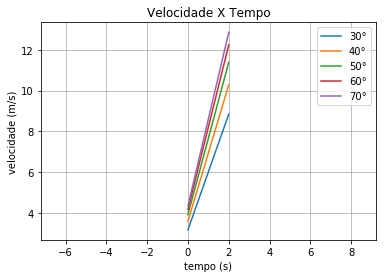

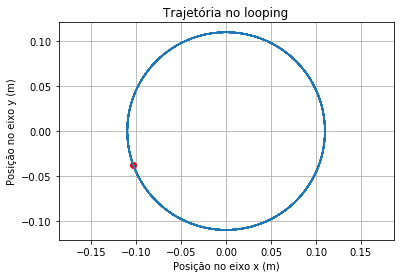

In [6]:
tempo1 = np.arange(0,2,delta_t) 

# Vamos encontrar com o código a seguir a velocidade final para cada ângulo e atualizar os valores de vf e a0
for angulo in lista_de_angulos:
    ang_radianos = math.radians(angulo)
    sen = math.sin(ang_radianos)
    cos = math.cos(ang_radianos)
    altura = 1.05*math.sin(ang_radianos)
    Xmax = altura/math.tan(ang_radianos)
    CI2 = [0,altura,0,0,0]
    solucao_para_velocidade = odeint(EquaçãoDiferencial, CI2, tempo, args=(ang_radianos,Xmax ))
    vxf = solucao_para_velocidade[:,2][-1]
    vyf = solucao_para_velocidade[:,3][-1]
    vf = math.sqrt((vxf**2) + (vyf**2))
    a0 = -math.pi/2 - ang_radianos
    w0 = vf/R_do_loop
    CI1 = [a0,w0,vf]
    solucao1 = odeint(EquaçãoDiferencial2, CI1, tempo1)

    #lista de todos os alphas no tempo
    alphas = solucao1[:,0]

    #lista de todos os omegas no tempo
    omegas = solucao1[:,1]

    #Calculando posição
    xloop = [R_do_loop*math.cos(a) for a in alphas]
    yloop = [R_do_loop*math.sin(a) for a in alphas]
    
    #velocidade final para cada ângulo
    vf_loop = solucao1[:,2][-1]
    
    #código para ver o comportamento da força Normal no percurso

    for a in alphas:
        N = [((m)*w**2*R_do_loop) - m*g*math.sin(a) for w in omegas]
    for i in range(len(N)):
        print(N[i])
    
    #plotando o gráfico
    plt.plot(tempo1, solucao1[:,2], label = "{0}°".format(angulo))
plt.grid(True)
plt.title('Velocidade X Tempo')
plt.xlabel('tempo (s)')
plt.ylabel('velocidade (m/s)')
plt.legend()
plt.axis('equal')
plt.show()





# Gráfico da trajetória
plt.plot(R_do_loop*math.cos(a0), R_do_loop*math.sin(a0), 'ro')
plt.plot(xloop, yloop)
plt.grid(True)
plt.title('Trajetória no looping')
plt.xlabel('Posição no eixo x (m)')
plt.ylabel('Posição no eixo y (m)')
plt.axis('equal')
plt.show()

**Validação por energia**

In [1]:
#calcular a energia do carrinho
energia_gravitacional1 = []
energia_cinetica1 = []
energia_total1 = []

for i in range(len(tempo)):
    a = solucao1[:,0][i]
    x_posicao = R_do_loop*math.cos(a)
    w = solucao1[:,1][i]
    v = w*R_do_loop
    y = R_do_loop*math.sin(a)
    cinetica = (m*v**2)/2 +4*(I*(v/R2)**2)/2    
    pot_gravitacional = m*g*y
    mecanica = cinetica+ pot_gravitacional
    
    if x_posicao <= 2*math.pi*R_do_loop:
        energia_gravitacional1.append(pot_gravitacional)
        energia_cinetica1.append(cinetica)
        energia_total1.append(mecanica)
    else:
        break

print(max(energia_total1))
print(min(energia_total1))

ultimo1 = len(energia_total1) 
#criando uma nova lista de tempo
tempo_valida1 = np.arange(0, ultimo1*delta_t, delta_t )



#plotando o gráfico das energias pelo tempo
plt.plot(tempo_valida1, energia_total1, label="Energia Mecânica")
plt.plot(tempo_valida1, energia_gravitacional1, label="Energia potencial gravitacional")
plt.plot(tempo_valida1, energia_cinetica1, label="Energia Cinética")
plt.ylabel('Energia (J)')
plt.xlabel('Tempo (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.title('Validação no looping')
plt.grid(True)
plt.show()

NameError: name 'tempo' is not defined

**Gráfico da trajetória total**

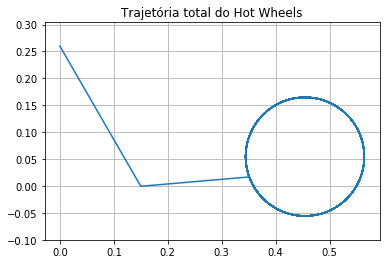

In [8]:
xtotal = []
ytotal = []
for i in range(0,len(tempo)):
    if(solucao[:,1][i]>=0):
        xtotal.append(solucao[:,0][i])
        ytotal.append(solucao[:,1][i])

for i in range(0,len(tempo1)):
    xtotal.append(xloop[i] + Xmax + R_do_loop*math.sin(ang))
    ytotal.append(yloop[i] + R_do_loop*math.cos(ang)) 


plt.plot(xtotal, ytotal)
plt.axis('equal')
plt.grid(True)
plt.title('Trajetória total do Hot Wheels')
plt.show()

**Gráficos conclusivos**

In [9]:
#Vamos plotar a seguir o gráfico conclusivo das velocidades finais pelos ângulos escolhidos na rampa

for angulo in lista_de_angulos:
    ang_radianos = math.radians(angulo)
    sen = math.sin(ang_radianos)
    cos = math.cos(ang_radianos)
    solucao_para_velocidade = odeint(EquaçãoDiferencial, CI, tempo, args=(ang_radianos,))
    vxf = solucao_para_velocidade[:,2][-1]
    vyf = solucao_para_velocidade[:,3][-1]
    vf = math.sqrt((vxf**2) + (vyf**2))
    plt.plot(angulo, vf,'o', label = '{0}° = {1} m/s'.format(angulo, '%.2f' %vf))
plt.xlabel('Ângulo (graus)')
plt.ylabel('velocidade final (m/s)')
plt.title('Velocidade finais em função dos ângulos')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

TypeError: EquaçãoDiferencial() missing 1 required positional argument: 'Xmax'

In [ ]:
#Vamos plotar a seguir o gráfico conclusivo das velocidades finais pelos ângulos escolhidos no looping

for angulo in lista_de_angulos:
    ang_radianos = math.radians(angulo)
    sen = math.sin(ang_radianos)
    cos = math.cos(ang_radianos)
    solucao_para_velocidade = odeint(EquaçãoDiferencial, CI, tempo, args=(ang_radianos,))
    vxf = solucao_para_velocidade[:,2][-1]
    vyf = solucao_para_velocidade[:,3][-1]
    vf = math.sqrt((vxf**2) + (vyf**2)) 
    a0 = -math.pi/2 - ang_radianos
    w0 = vf/R_do_loop
    CI1 = [a0,w0,vf]
    solucao1 = odeint(EquaçãoDiferencial2, CI1, tempo1)
    vf_loop = solucao1[:,2][-1]
    plt.plot(angulo, vf_loop, 'o', label = '{0}° = {1} m/s'.format(angulo, '%.2f' %vf_loop))
plt.title('Velocidades finais X Ângulos')
plt.xlabel('Ângulo (graus)')
plt.ylabel('Velocidade final (m/s)')
plt.legend()
plt.grid(True)
plt.show()